# Distribuciones en forma de anillo

In [9]:
from math import sin, cos, pi, radians, sqrt
import numpy as np 
import numpy.random as rnd
import matplotlib.pyplot as plt

In [10]:
def ring(r_min=0, r_max = 1, n_samples=360):
    angle = rnd.uniform(0,2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a,d in zip(angle, distance): 
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

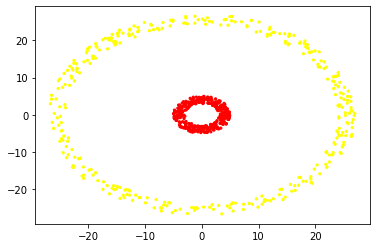

In [30]:
data1 = ring(3,5)
data2 = ring(24, 27)
data = np.concatenate([data1, data2], axis =0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c=labels, s=5, cmap="autumn")

## Algoritmo con K-Means

In [31]:
from sklearn.cluster import KMeans

[[ -4.39932036  -1.51157802]
 [  4.60338437   0.08075449]
 [  0.96229366  -4.76244329]
 ...
 [ -5.08291624  25.15011153]
 [-15.44770772 -20.14133499]
 [ -7.52942495  22.82517739]]


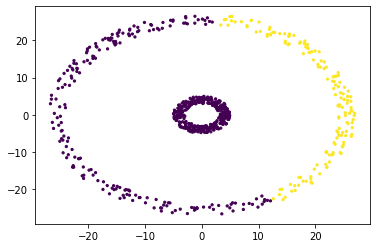

In [36]:
km = KMeans(2).fit(data)
clust = km.predict(data)
print(data)
plt.scatter(data[:,0], data[:,1], c=clust, s=5)

# Algoritmo K-Medoids

In [37]:
from pyclust import KMedoids

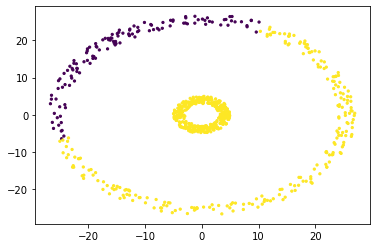

In [40]:
kmed = KMedoids(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=kmed, s=5)

# Algoritmo de clustering espectral

In [41]:
from sklearn.cluster import SpectralClustering

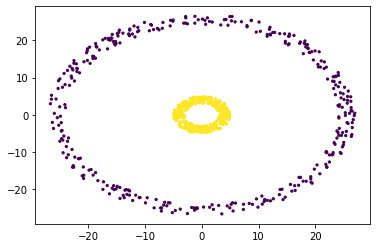

In [44]:
clust = SpectralClustering(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=clust, s=5)

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral